# Experiment 1
Test how to load a video and show the first frame.
_Assuming a file located in ~/samples/vid.mp4_



In [7]:
# pip 
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [8]:
# import libraries
import cv2 
import numpy as np
import matplotlib.pyplot as plt

Loading the video

In [9]:
# Get path to video clip from a form 
#@title Video clip path
file_path = "../samples/vid.mp4" #@param {type:"string"}


## Define Partial Derivative
Define the partial derivative on change of images in terms of:
1. Translation (x,y) with respect to time 

TODO:
1. Changes in brightness (I) with respect to time
2. Changes in Hue (H) with respect to time
3. Scale (s) with respect to time
4. Rotation (r) with respect to time

In [10]:
def dx_dt(frame_1: np.ndarray, frame_2: np.ndarray) -> np.ndarray:
    """Calculates the partial derivative (x transaltion) of the image with respect to time
    Args:
        frame_1 (np.ndarray): image at t
        frame_2 (np.ndarray): image at t+1
    Returns:
        np.ndarray: derivative of the image with respect to time (x translation)
    """
    # shift frame_1 to the left by 1 pixel
    frame_1_shifted = np.roll(frame_1, -1, axis=1)

    return frame_2 - frame_1_shifted
    

In [11]:
def dy_dt(frame_1: np.ndarray, frame_2: np.ndarray) -> np.ndarray:
    """Calculates the partial derivative (y transaltion) of the image with respect to time
    Args:
        frame_1 (np.ndarray): image at t
        frame_2 (np.ndarray): image at t+1
    Returns:
        np.ndarray: derivative of the image with respect to time (y translation)
    """

    # shift frame_1 up by 1 pixel
    frame_1_shifted = np.roll(frame_1, -1, axis=0)

    return frame_2 - frame_1_shifted

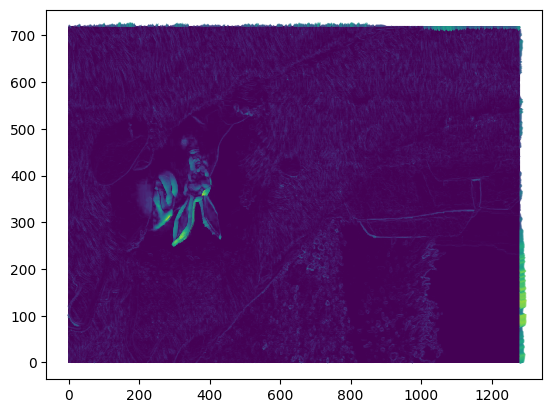

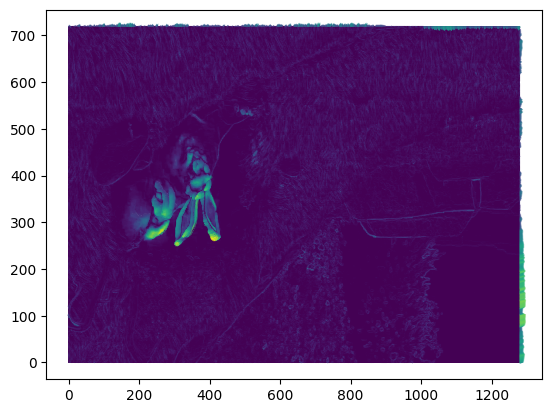

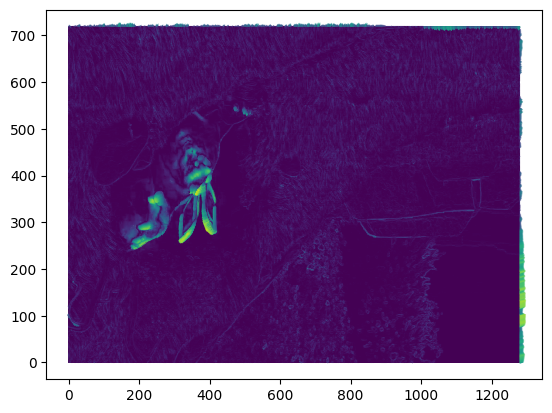

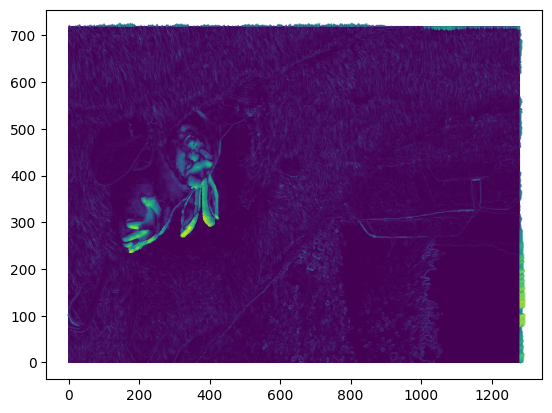

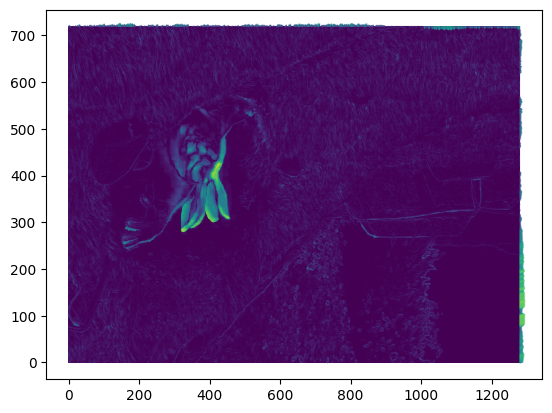

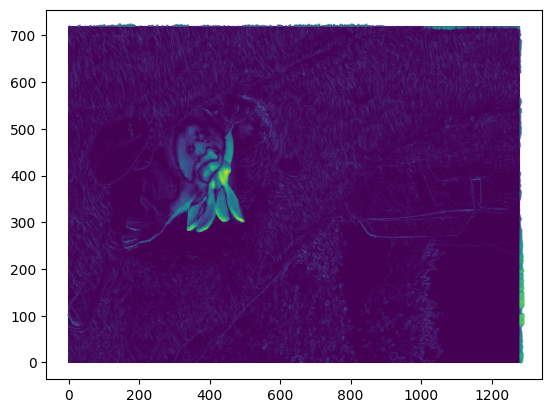

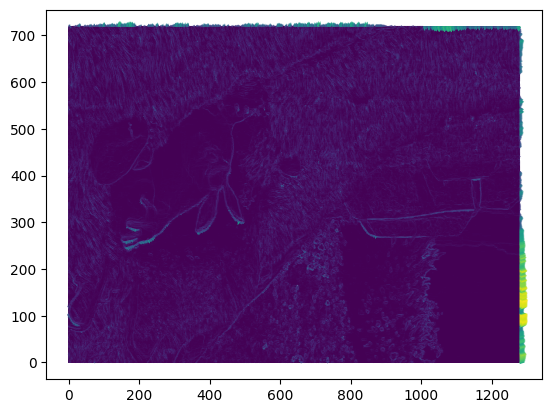

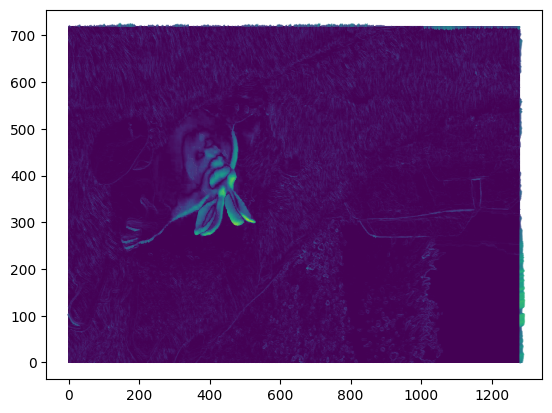

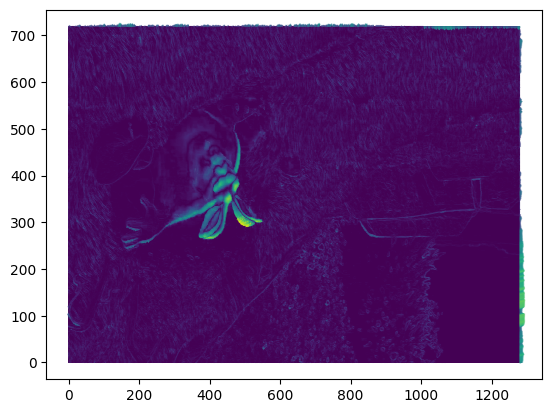

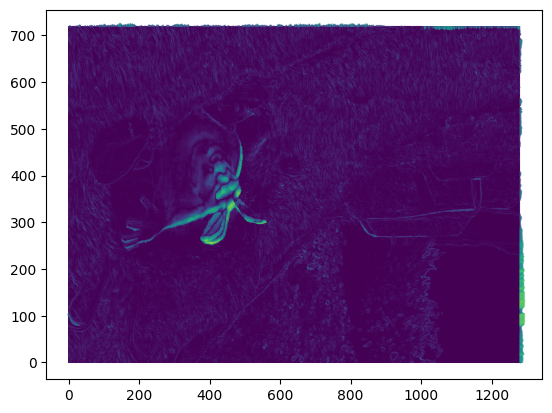

In [12]:

video = cv2.VideoCapture(file_path)
success, image = video.read()
count = 0

# get image dimensions
height, width, layers = image.shape

# create i_1, i_2 matrix for storing images
i_1 = np.zeros((height, width, layers), dtype=np.uint8)
i_2 = np.zeros((height, width, layers), dtype=np.uint8)

# pre-populate i_2 with first frame
i_2 = image

# build X, Y grid for quiver plot
x = np.arange(0, width, 1)
y = np.arange(0, height, 1)

X, Y = np.meshgrid(x, y)

while success:
    # populate i_1 with i_2
    i_1 = i_2

    # populate i_2 with next frame
    success, i_2 = video.read()

    # if shape of i_2 is not equal to i_1, or either shape is None break
    if i_1 is None or i_2 is None or i_2.shape != i_1.shape:
        break    
    # flatten color channels
    flat_i_1 = i_1.mean(axis=2)
    flat_i_2 = i_2.mean(axis=2)

    # get translation derivative
    dx_dt_img = dx_dt(flat_i_1, flat_i_2)
    dy_dt_img = dy_dt(flat_i_1, flat_i_2)
    color = np.sqrt(dx_dt_img**2 + dy_dt_img**2)
    
    # plot the derivative as quiever plot
    plt.quiver(X, Y, dx_dt_img, dy_dt_img, color)
    
    plt.show()